# Credit Card Customer Segmentation
---

_Graded Challenge ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada konsep Clustering._

## Introduction
Author : Hafidzati Hikmadani <br>



## Dataset

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :

CUSTID : Identification of Credit Card holder (Categorical)<br>
BALANCE : Balance amount left in their account to make purchases <br>
BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)<br>
PURCHASES : Amount of purchases made from account<br>
ONEOFFPURCHASES : Maximum purchase amount done in one-go<br>
INSTALLMENTSPURCHASES : Amount of purchase done in installment<br>
CASHADVANCE : Cash in advance given by the user<br>
PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)<br>
ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)<br>
PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)<br>
CASHADVANCEFREQUENCY : How frequently the cash in advance being paid<br>
CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"<br>
PURCHASESTRX : Numbe of purchase transactions made<br>
CREDITLIMIT : Limit of Credit Card for user<br>
PAYMENTS : Amount of Payment done by user<br>
MINIMUM_PAYMENTS : Minimum amount of payments made by user<br>
PRCFULLPAYMENT : Percent of full payment paid by user<br>
TENURE : Tenure of credit card service for user<br>

You could download dataset from [here](https://www.kaggle.com/arjunbhasin2013/ccdata).<br>


## Goals

1. How Many Customer we have Based On Credit Limit?
2. How Credit Limit Affecting each of Transaction Frequency?
3. How many portion of client do we have who has 1 frequency of each type of transaction?
4. How many portion of client do we have who has 0 frequency of each type of transaction?
5. The Bank planning to create a strategy team for increasing their product of credit card. They need some customer segmentation so they could divide their team and focusing in each of custmer group. How many customer group should divided to get ideal customer segmentation?

## Import Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import BayesianGaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import NearestNeighbors


from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

## Data Loading

In [4]:
#Load Data
data = pd.read_csv("CC GENERAL.csv")
data.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [5]:
#Check data properties
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

We have 18 attributes aboves with 1 object attributes and 17 numeric attributes. But, based on data information before , some numeric attributes might be a categorical which represents by binary. We will treat those kind of attributes as object.

## Data Cleaning

In [6]:
#Copy data
df = data.copy()

### Check Missing Value

In [7]:
#Checking missing values
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

We will change missing value with the median of it's data.

In [8]:
#Change missing value
df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].median(), inplace=True)
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].median() ,inplace=True)

In [9]:
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Next, we will divide our data into numerical and categorical data.

In [10]:
#Split Categoric and Num Data 
num_df = df[["BALANCE","PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CASH_ADVANCE_TRX","PURCHASES_TRX","CREDIT_LIMIT","PAYMENTS","MINIMUM_PAYMENTS","PRC_FULL_PAYMENT","BALANCE_FREQUENCY","PURCHASES_FREQUENCY","ONEOFF_PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY","CASH_ADVANCE_FREQUENCY"]]
cat_df = df[["CUST_ID","TENURE"]]

## Data Visualization

<ipython-input-11-f409d190f275>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  num_df.hist(ax=ax , color='purple')


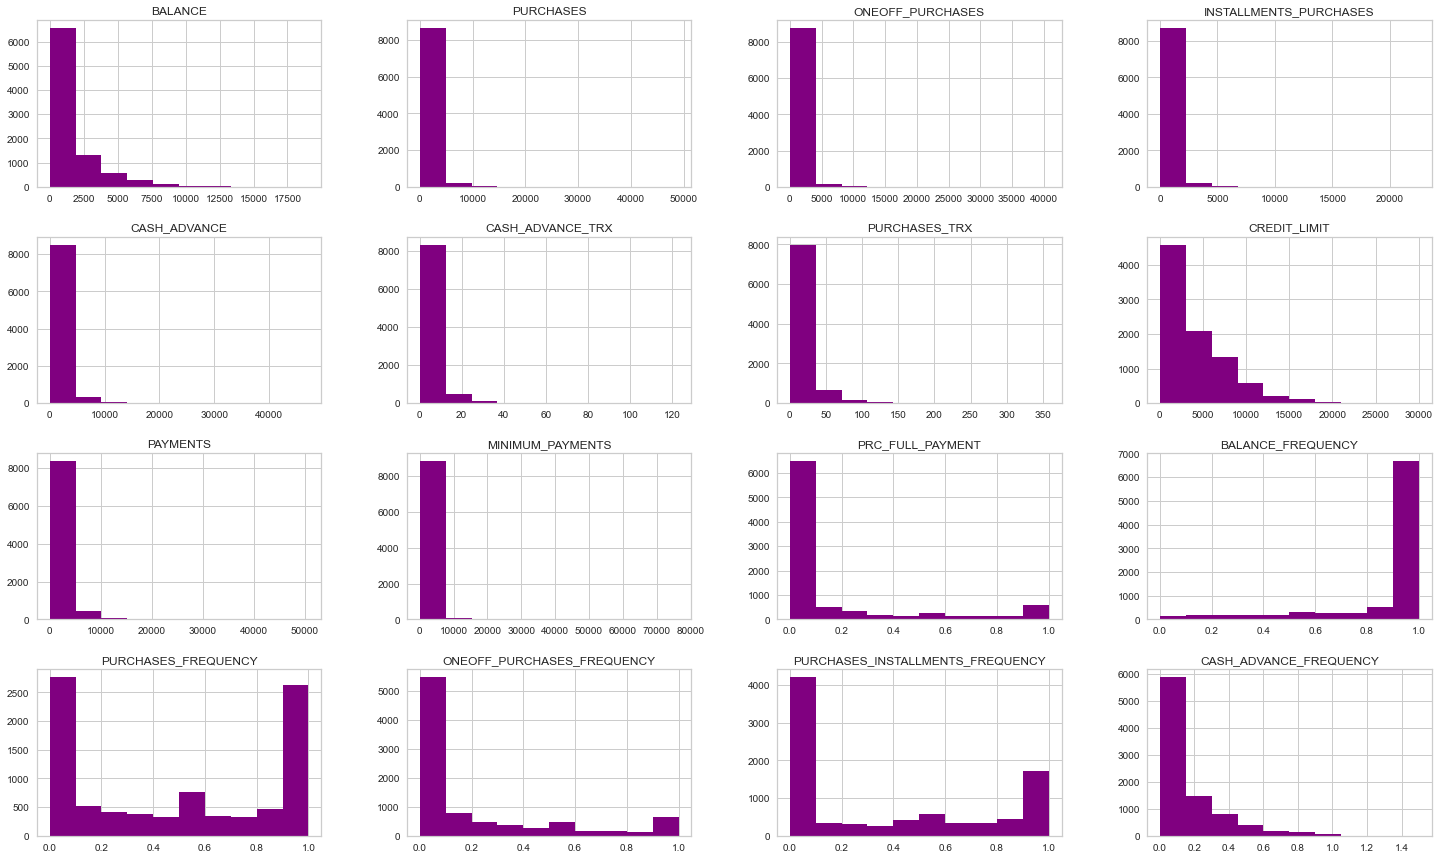

In [11]:
#Distribution of numerical Data
fig = plt.figure(figsize=(25,15));
ax = fig.gca();
num_df.hist(ax=ax , color='purple')
plt.show()

Mostly our numerical data dont have normal distribution. They tend to have long skewed form and wide range of data variety. It means our range of date might have some outlier . Mostly data is grouped in the low values.

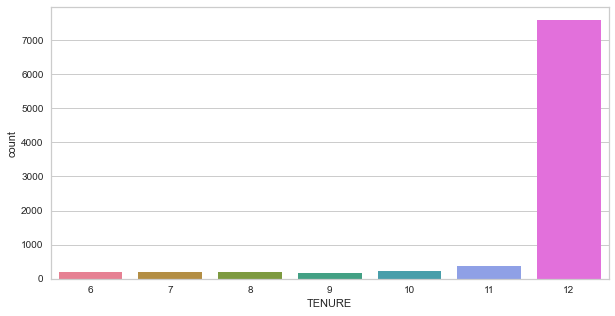

In [12]:
#Distribution of Categorical Data
plt.figure(figsize=(10,5));
sns.countplot(data=df,  palette="husl", x="TENURE")
plt.show()

From above graph we could see , mostly the client of credit card has tenure 12 months.

__How Many Customer we have Based On Credit Limit?__



In [13]:
#Put CreditLimit into range group
df["CL_RANGE"] = pd.Series("5K" if i <= 5000 else "10K" if i <= 10000 else "15K" if i <= 15000 else "20K" if i <= 20000 else "25K" if i <= 25000 else "30K" for i in df["CREDIT_LIMIT"])

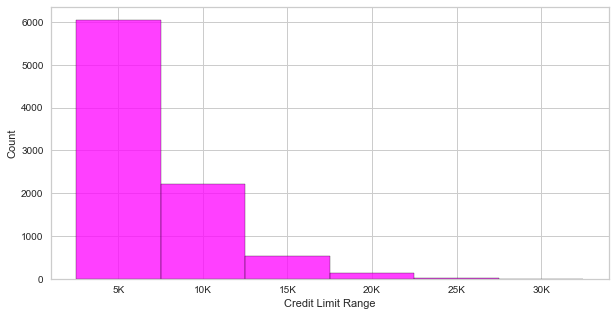

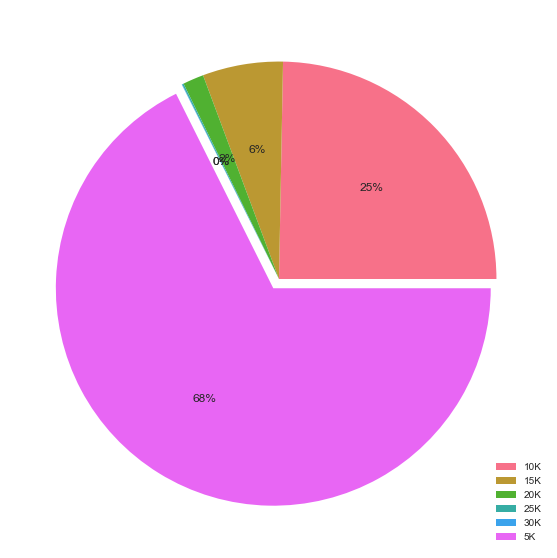

In [14]:
#Graph
plt.figure(figsize=(10,5))
sns.histplot(df['CL_RANGE'], color="magenta")
plt.xlabel("Credit Limit Range")
plt.show()

qr1 = df.groupby("CL_RANGE")["CREDIT_LIMIT"].count().reset_index()

plt.figure(figsize=(12,10))
colors = sns.color_palette('husl')[0:13]
plt.pie(qr1['CREDIT_LIMIT'], autopct='%.0f%%', explode=[0,0,0,0,0,0.05], colors=colors )
plt.legend(qr1["CL_RANGE"], loc="best")
plt.show()


For 6 latest month, we have total portion client based on credit limit :


> 68% of client for range 0-5k 

> 25% client for range 5k-10k,

> 6% client for range 10-15k

> 1.5% client for  range15-20k

> 0.11% client for range 20-25k

> 0.03% client for range 25-30k

We could conclude, mostly our client has limit credit between 0-5K. From this insight we might improve our advertisement to get more client with limit credit above 5k or to encourage our client to level up their limit credit.



__How Credit Limit Affecting each of Transaction Frequency?__

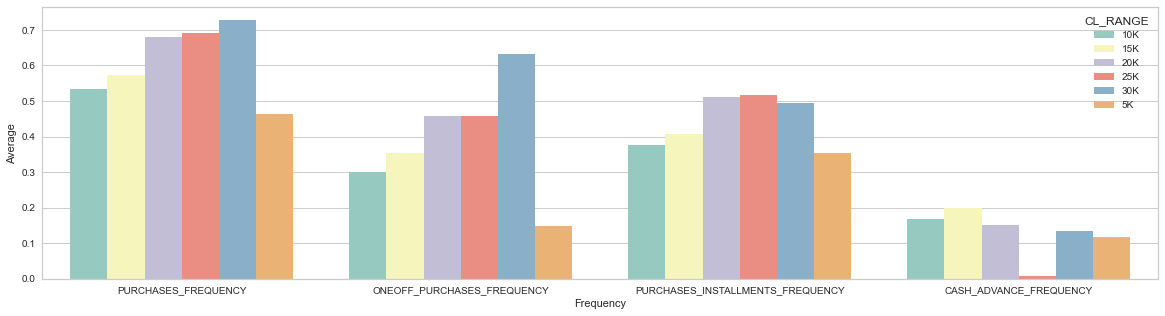

In [15]:
#Query
qr2 = df.groupby("CL_RANGE").mean()[["PURCHASES_FREQUENCY", "ONEOFF_PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY","CASH_ADVANCE_FREQUENCY"]].reset_index()
qr2 = pd.melt(qr2, id_vars="CL_RANGE")

#Graph
plt.figure(figsize=(20,5))
sns.barplot(data=qr2, x="variable",y ="value", palette="Set3", hue="CL_RANGE")
plt.xlabel("Frequency")
plt.ylabel("Average")
plt.show()


From above graph, we could say that client who has limit 20-30k tend to spend their credit card for purchases ,one-off purchases and purchases instalments oftenly while mostly client with limit 10-15k do cash advance transaction more.

The client with limit below 5k rarely do transaction with credit card , except for cash advance. They are in second position from below.

We could conclude, the frequency of transaction purchases, one-off purchases and purchase installments is inline with the limit credit except for cash advance transaction. For this, client with middle limit tend not to use it that much.

__How many portion of client do we have who has 1 frequency of each type of transaction?__


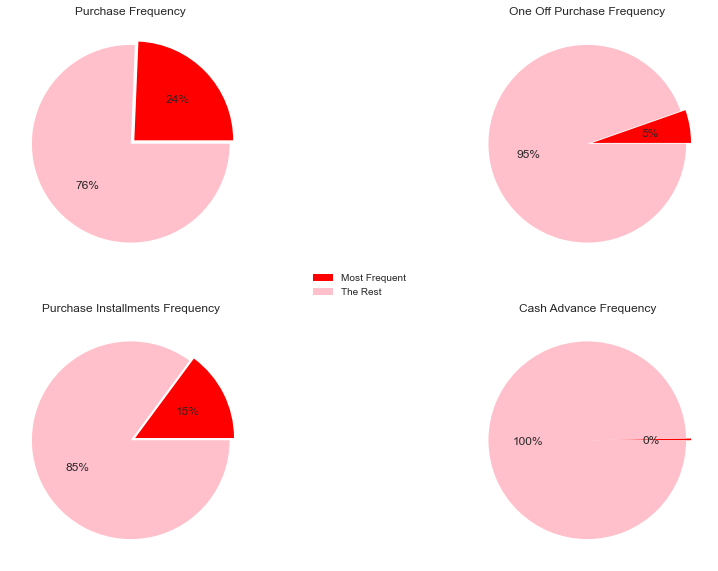

In [16]:
#Query
qr3 = df[df["PURCHASES_FREQUENCY"] == 1]["CUST_ID"].count()
qr4 = df[df["ONEOFF_PURCHASES_FREQUENCY"] == 1]["CUST_ID"].count()
qr5 = df[df["PURCHASES_INSTALLMENTS_FREQUENCY"] == 1]["CUST_ID"].count()
qr6 = df[df["CASH_ADVANCE_FREQUENCY"] == 1]["CUST_ID"].count()
total = df["CUST_ID"].count()

#Graph
fig, ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].pie([qr3,total-qr3], autopct='%.0f%%', explode=[0.05,0], colors=["red","pink"])
ax[0,0].set_title("Purchase Frequency")
ax[0,1].pie([qr4,total-qr4], autopct='%.0f%%', explode=[0.05,0], colors=["red","pink"])
ax[0,1].set_title("One Off Purchase Frequency")
ax[1,0].pie([qr5,total-qr5], autopct='%.0f%%', explode=[0.05,0], colors=["red","pink"])
ax[1,0].set_title("Purchase Installments Frequency")
ax[1,1].pie([qr6,total-qr6], autopct='%.0f%%', explode=[0.05,0], colors=["red","pink"])
ax[1,1].set_title("Cash Advance Frequency")

fig.legend(["Most Frequent","The Rest"], loc="center")
plt.show()


From above graph, 24% of client has the highest (1) frequency in purchases, 5% in one-off purchase, 15% in purchase installments, while in cash advance, there is no high frequency client. 

We could conclude mostly client who has high frequency transaction do purchases transation with credit card in latest 6 months.

__How many portion of client do we have who has 0 frequency of each type of transaction?__

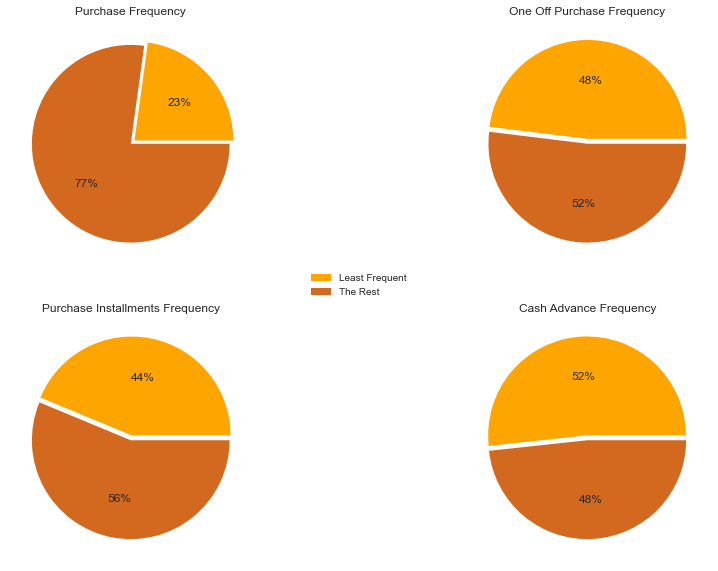

In [17]:
#Query
qr7 = df[df["PURCHASES_FREQUENCY"] == 0]["CUST_ID"].count()
qr8 = df[df["ONEOFF_PURCHASES_FREQUENCY"] == 0]["CUST_ID"].count()
qr9 = df[df["PURCHASES_INSTALLMENTS_FREQUENCY"] == 0]["CUST_ID"].count()
qr10 = df[df["CASH_ADVANCE_FREQUENCY"] == 0]["CUST_ID"].count()
total = df["CUST_ID"].count()

#Graph
fig, ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].pie([qr7,total-qr7], autopct='%.0f%%', explode=[0.05,0], colors=["orange","chocolate"])
ax[0,0].set_title("Purchase Frequency")
ax[0,1].pie([qr8,total-qr8], autopct='%.0f%%', explode=[0.05,0], colors=["orange","chocolate"])
ax[0,1].set_title("One Off Purchase Frequency")
ax[1,0].pie([qr9,total-qr9], autopct='%.0f%%', explode=[0.05,0], colors=["orange","chocolate"])
ax[1,0].set_title("Purchase Installments Frequency")
ax[1,1].pie([qr10,total-qr10], autopct='%.0f%%', explode=[0.05,0], colors=["orange","chocolate"])
ax[1,1].set_title("Cash Advance Frequency")

fig.legend(["Least Frequent","The Rest"], loc="center")
plt.show()

From above graph, 23% of client has the least frequency (0) in purchases, 48% in one-off purchase, 44% in purchase installments, and 52% in cash advance. 

We could conclude there is so many client who's not use their credit card in latest 6 months.

## Data PreProcessing

Since goals is to make cluster from dataset, we will only use numerical feature.

We will do some preprocesing :
- Scaling our numeric data
- Check MultiCollinearity
- Dimensionality Reduction

###  Scaling Numerical Data

In [18]:
#Define Scaler
scaler = StandardScaler()

#Fit and transform numerical data
num_dfs = scaler.fit_transform(num_df)

### Calculating MultiCollinearity

In here we will check if there is any multicollinearity between our features.

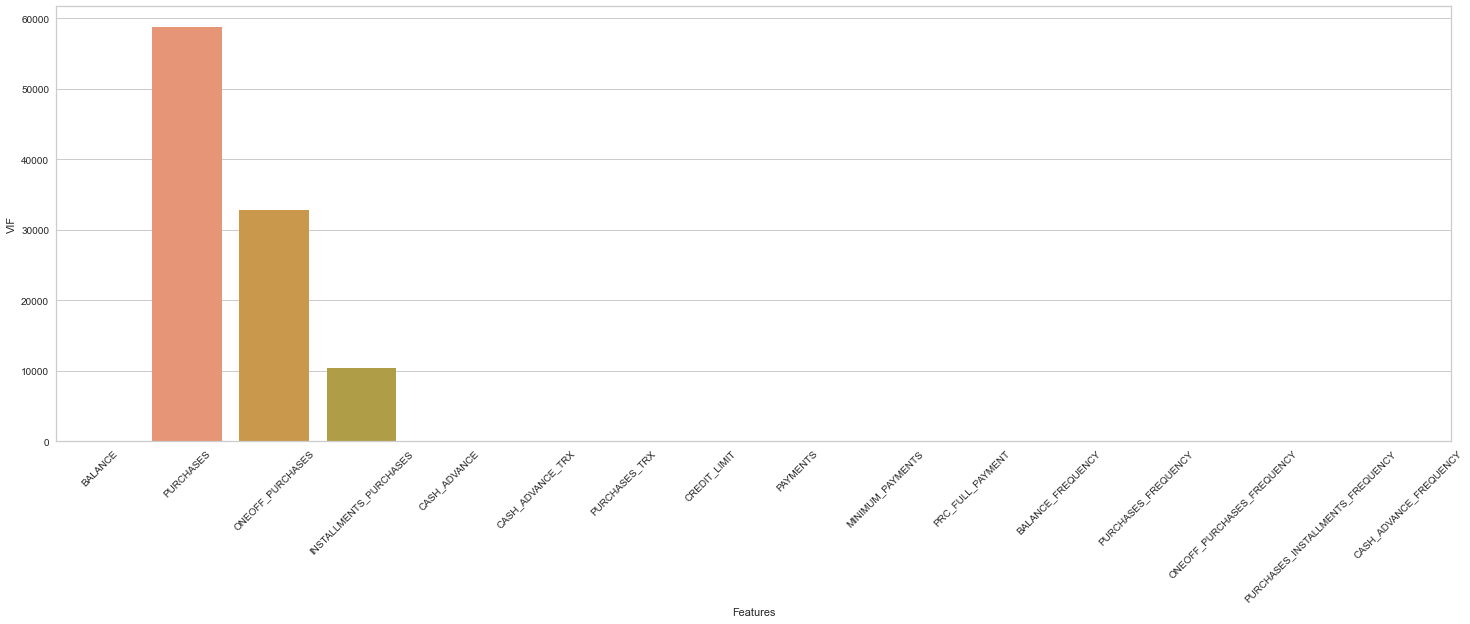

,Features,VIF
0,BALANCE,3.970050
1,PURCHASES,58769.184349
2,ONEOFF_PURCHASES,32774.699175
3,INSTALLMENTS_PURCHASES,10399.043752
4,CASH_ADVANCE,3.444597
5,CASH_ADVANCE_TRX,3.878731
6,PURCHASES_TRX,4.247331
7,CREDIT_LIMIT,4.157087
8,PAYMENTS,3.540834
9,MINIMUM_PAYMENTS,1.401882


In [19]:
#Define VIF dataFrame
vif_data= pd.DataFrame()
vif_data["Features"] = num_df.columns

#Calculate VIF 
vif_data["VIF"] = [variance_inflation_factor(num_df.values, i)
                    for i in range(len(num_df.columns))]

#Graph
plt.figure(figsize=(25,8))
sns.barplot(x=vif_data["Features"], y=vif_data["VIF"])
plt.xticks(rotation=45)
plt.show()

vif_data

We coudd see we have 7 features which has high multicollinearity above 5. It means , to get the best result we only could reduct the dimension until 16-7 = 9 Dimension.

### Dimensionality Reduction

We will using PCA for reduct the dimensionality. We've check the multicollinearity before and got 9 as maksimum target reduction. But here we'll recheck it again to find the best maksimum reduction.

The Goals of this reduction to get the best dimension which atleast could represents 90% of data.

In [20]:
#Define PCA Model
pca1 = PCA(n_components=16)
pca1.fit(num_dfs)

PCA(n_components=16)

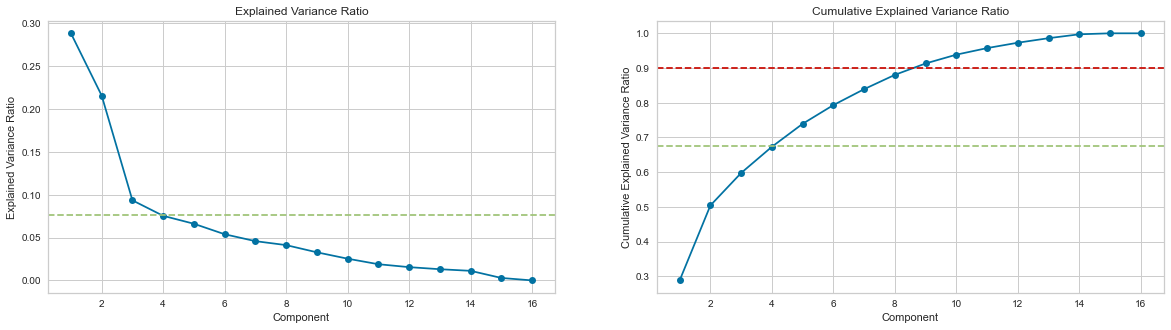

In [21]:
#Find out the best explained variance ratio and its cummulative
fig,ax = plt.subplots(ncols=2, figsize=(20,5))

ax[0].plot(range(1,17), pca1.explained_variance_ratio_ ,marker='o')
ax[0].axhline(y = 7.64018875e-02, color = 'g', linestyle = 'dashed') 
ax[0].set_xlabel('Component')
ax[0].set_ylabel('Explained Variance Ratio')
ax[0].set_title("Explained Variance Ratio")

ax[1].plot(range(1,17), np.cumsum(pca1.explained_variance_ratio_), marker='o')
ax[1].axhline(y = 0.9, color = 'r', linestyle = 'dashed') 
ax[1].axhline(y = 0.6754588938106958, color = 'g', linestyle = 'dashed') 
ax[1].set_xlabel('Component')
ax[1].set_ylabel('Cumulative Explained Variance Ratio')
ax[1].set_title("Cumulative Explained Variance Ratio")

plt.show()

We could see , if we use elbow method to choose the best component (left graph with green dashed line) it will be 4.

But if we see in right graph (the green line dashed) with 4 dimension, we could only represents 69% of data . So we will choose 9 dimension instead which represents 90% of our data (the red line dashed)

In [22]:
#Create model PCA 9 Dimensions
pca_fin = PCA(n_components=9)
X_train = pca_fin.fit_transform(num_dfs)

No we have new dataset with only has 9 dimension for our model.

## Model Definition & Training

In this section we will try to cluster the dataset with some type of model.

### Model 1 : K-Means

We will find the best quantity of  cluster number with some iteration.

__Find the best quantity of cluster__

In [23]:
#Define Iteration Model
n = []
sh = []

for i in range(2,16):
    km = KMeans(n_clusters=i ,init="k-means++", random_state=42)
    km.fit(X_train)
    n.append(km.inertia_)
    sh.append(silhouette_score(X_train, km.labels_))

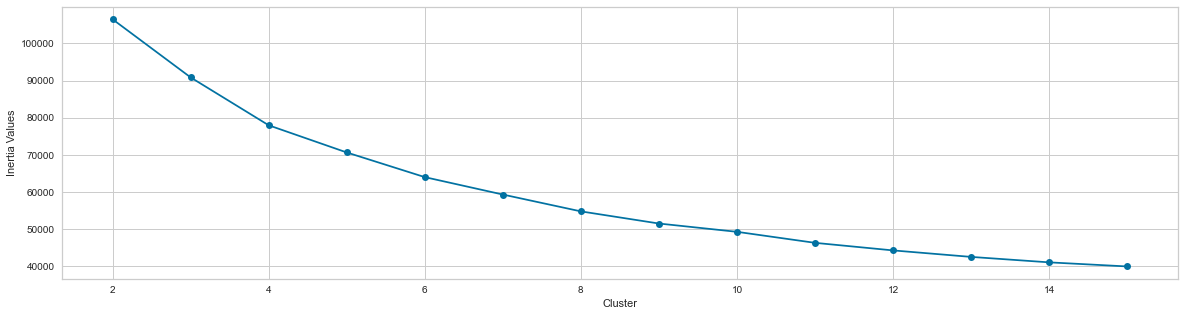

In [24]:
#Find out the best explained variance ratio
fig= plt.subplots(figsize=(20,5))

plt.plot(range(2,16), n ,marker='o')
plt.xlabel('Cluster')
plt.ylabel('Inertia Values')
plt.show()

Froam above graph, we could see the elbow method wether is in value 4 or 5. Let's do some more check with Silhoutte Value.

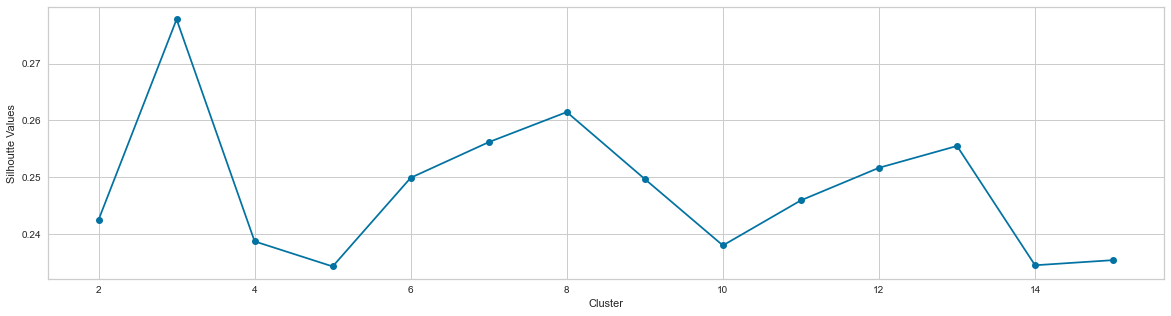

In [25]:
#Find out the best explained variance ratio
fig= plt.subplots(figsize=(20,5))

plt.plot(range(2,16), sh ,marker='o')
plt.xlabel('Cluster')
plt.ylabel('Silhoutte Values')
plt.show()

We were wrong, the optimum cluster is 3 because it has the highest Shilloute Score which means average distance between cluster almost 0,28 . So we will choose the n_clusters = 3 .

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=42))

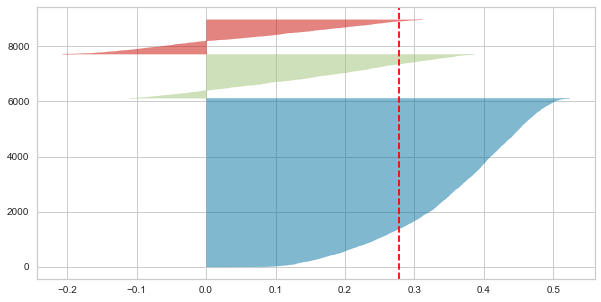

In [26]:
#Silhoutte of best n cluster
warnings.filterwarnings("ignore")
km = KMeans(n_clusters=3 ,random_state=42)

fig , ax = plt.subplots(figsize=(10,5));
visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax= ax);
visualizer.fit(X_train)

We could see from silhoutete plot, those 3 cluster is still in range of average silhoute score. The biggest cluster is cluster 1 and we have some datapoints in cluster 0 and 2 which is in wrong clusters.

#### Final Model 1 : KMeans

Below our best cluster model with n cluster = 3.

In [27]:
#Define the final Model
km_fin = KMeans(n_clusters=3, random_state=42)

#Train the dataset
km_fin.fit(X_train)


KMeans(n_clusters=3, random_state=42)

### Model 2 : DBSCAN

__Find the best epsilon value using NearestNeighbors__

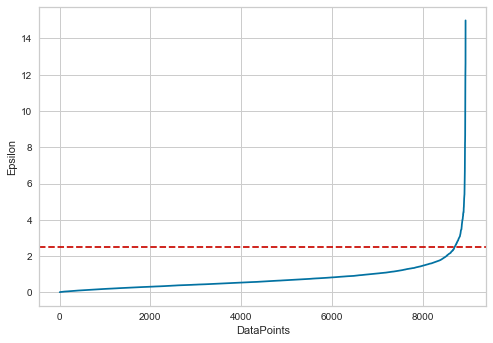

In [28]:
#Find nearest point
nn = NearestNeighbors(n_neighbors=20)
nn.fit(num_dfs)
distance,indices = nn.kneighbors(num_dfs)

distances = np.sort(distance, axis=0)

plt.plot(distances[:,1])
plt.axhline(y = 2.5, color = 'r', linestyle = 'dashed') 
plt.ylabel("Epsilon")
plt.xlabel("DataPoints")
plt.show()

From above graph, we could choose the maximum value of epsilon by using elbow method. And it goes in epsilon value around 2,5.

#### Final Model 2 : DBSCAN

Below our final model of DBSCAN with epsilon = 2.5

In [29]:
#Build the model
dbscan_fin = DBSCAN(eps=2.5 , min_samples=10)

#Train and predict the dataset
dbscan_fin.fit(X_train)


DBSCAN(eps=2.5, min_samples=10)

### Model 3 : Bayesian Gaussian Mixstures

In model 3, we will using Bayesian Gaussian Mixsture to find out the best cluster from our dataset.

In [30]:
#Build the model
bgm_fin = BayesianGaussianMixture(n_components=3, n_init=10, random_state=42)

#Train Model
bgm_fin.fit(X_train)

BayesianGaussianMixture(n_components=3, n_init=10, random_state=42)

In [31]:
#Check weights data of every cluster
np.round(bgm_fin.weights_, 2)

array([0.38, 0.3 , 0.33])

From above result, with bayesian gaussian mixsture with cluster = 3, we find out all cluster has its own probability of dataset and the probability are vary.

## Model Evaluation

Eventhough it's hard to evaluate and decide good clustering model because it's unsupervised learning, here we will try to compare visualization of each models. 

We will reduct the dataset into 2D dimension eventhough it won't represents all of the data, but only for visualization purpose.

### Dimension Reduction into 2D PCA 

In [32]:
#Create mode PCA 2 Dimensions
pca2d = PCA(n_components=2)
X_train2d = pca2d.fit_transform(num_dfs)

### Visualization in 2D

#### Model 1 : K-Means

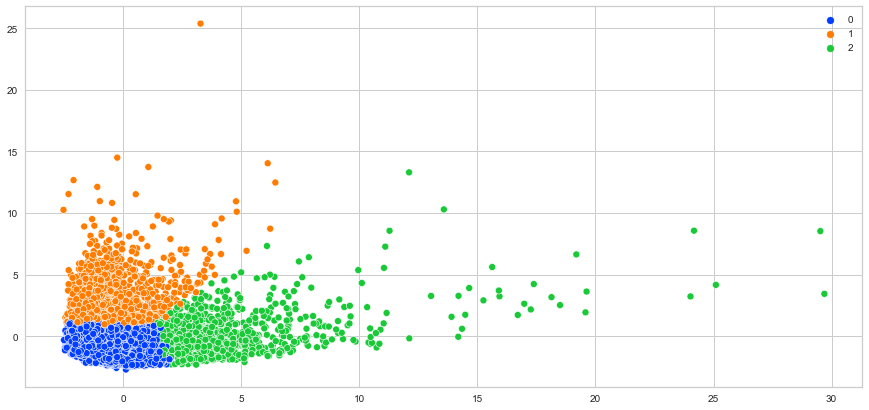

In [33]:
#Predict dataset
y1 = km_fin.predict(X_train)

#Graph
plt.figure(figsize=(15,7))
sns.scatterplot(x =X_train2d[:,0], y =X_train2d[:,1], hue=y1, palette="bright")
plt.show()

From 2D perspective, we could see in K-Means Model, the dataset is divided into 3 cluster. The boundaries of each cluster is tight with others.

#### Model 2 : DBSCAN

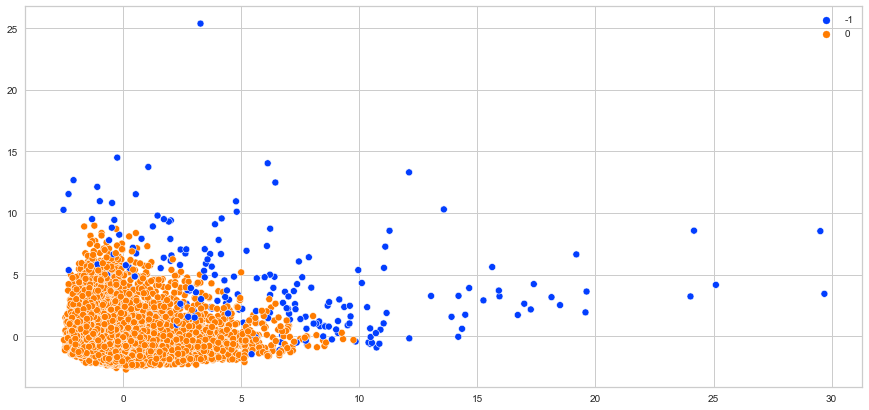

In [34]:
#Predict dataset
y2 = dbscan_fin.fit_predict(X_train)

#Graph
plt.figure(figsize=(15,7))
sns.scatterplot(x =X_train2d[:,0], y =X_train2d[:,1], hue=y2, palette="bright")
plt.show()

In DBSCAN model, the dataset is divided into 2 cluster. The boundaries of each cluster seems highly bias each other.

#### Model 3 : Bayesian Gaussian Mixture

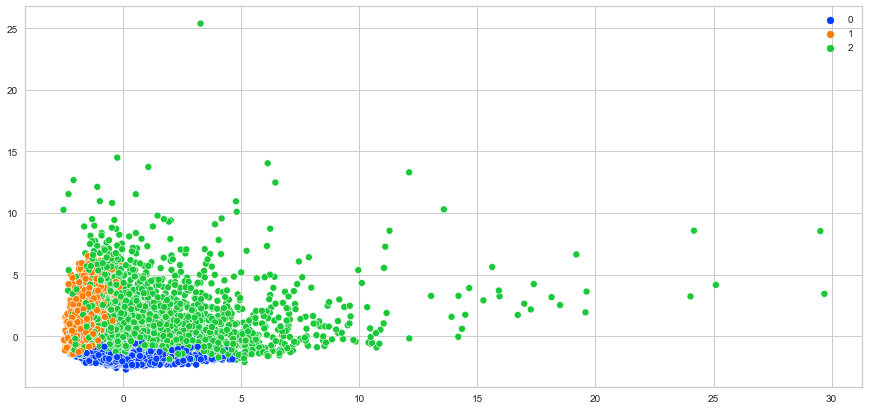

In [35]:
#Predict dataset
y3 = bgm_fin.fit_predict(X_train)

#Graph
plt.figure(figsize=(15,7))
sns.scatterplot(x =X_train2d[:,0], y =X_train2d[:,1], hue=y3, palette="bright")
plt.show()

In Bayesian Gaussian Mixsture, our dataset is divided into 3 cluster. But the boundaries of each cluster same with DBSCAN , it has bias.

### Final Model

From those 3 models 2D Visualization above, we will choose __Model 1 : K-Means__ as our final model because it has the most clear boundaries between each cluster. 

Next we will analyze the result of the Model 1 - KMeans by comparing average values of each features between 3 clusters.

####  Analyze clustering Model 1 KMeans using Spider Plot

In [36]:
#Combine label with scaled raw data
X_result1 = pd.concat([pd.DataFrame(num_dfs, columns=num_df.columns), pd.Series(y1, name="LABEL")], axis=1)

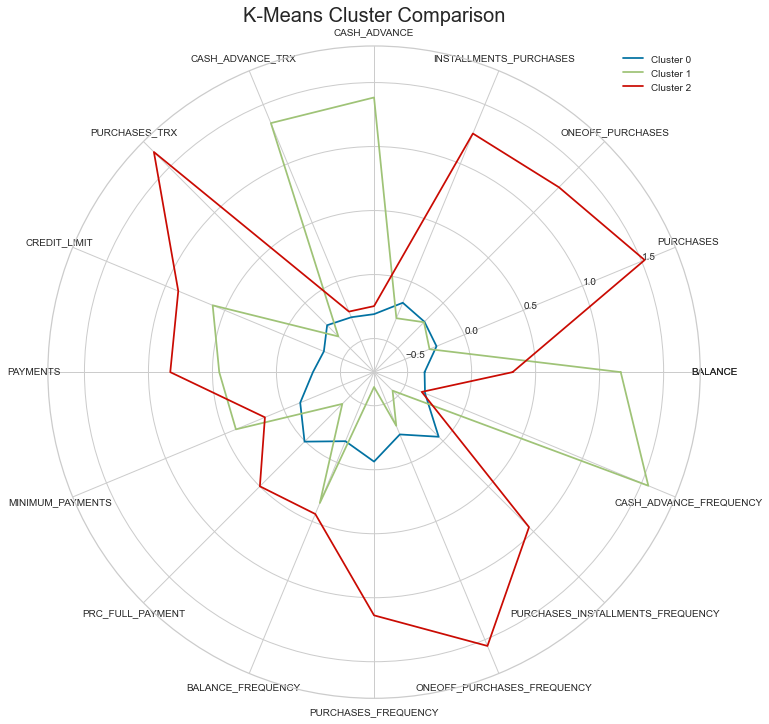

In [37]:
# Create Graph
label_loc = np.linspace(0,2*np.pi, len(X_result1.columns))
label = list(num_df.columns)
label = [*label, label[0]]
means = X_result1.groupby("LABEL").mean().to_numpy()
means0 = [*means[0],means[0,0]]
means1 = [*means[1],means[1,0]]
means2 = [*means[2],means[2,0]]

plt.figure(figsize=(12,12))
plt.subplot(polar=True)
plt.plot(label_loc, means0 , label ="Cluster 0" )
plt.plot(label_loc, means1 , label ="Cluster 1" )
plt.plot(label_loc, means2 , label ="Cluster 2" )
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=label)
plt.title("K-Means Cluster Comparison", size=20)
plt.legend()
plt.show()

From above spider plot ,we could focus on intersection between the radius with each line . When the intersection is at outermost position, it means this line has high average of variables. 

We might take some intepretation below :




> __Cluser 0__ is containing client who has high credit limit. From transaction activity , these client's balance is high frequently updated, means they tend to use credit card oftenly. These client has high frequent of credit card trasanction mostly for common purchases, one off purchase even for installment purchases but they rarely use it for cash advance transaction. From their behaviour to pay the bill of credit card we could say it's more healthy than other cluster. We could conclude, these cluster contains client who has high income and they use their credit card so well for they needs. We will call it this cluster as __The Wiz__.


> __Cluser 1__ is containing client who has low credit limit. This clients tend to use their credit card for common purchases ,one-off purchases , installments transaction, ofently eventhough not that often with Cluster 0. Their balanced update frequency is low. From their billing pay behavior they have fair level of healthy repayment, it's inline with their low credit limit.  We could conclude this type of client might have started their journey in using credit card and it'll could be our potensial client to make they improve their activity in using credit card. We could call this cluster as __The Cub__.


> __Cluster 2__ is containing client who has fair credit limit. This clients tend to use their credit card mostly for cash advance transaction. Their balance update frequency is fair. They rarely use credit card for common purchases or installments purchases. Their repayment behaviour is fair enough but they percents of full payment is low. We could think, this type of client something suspicous because they usually do cash advance from credit which we can't know what transaction they do. We could call this cluster as __The Leery__ .







## Model Inference

In this section we will use 5 random data of our data set as our sample test , to do prediction.

In [38]:
#Data Creation
sample = num_df.sample(n=5, random_state=42)

#Data PreProcessing
samples = scaler.transform(sample) #scale data
X_sample = pca_fin.transform(samples) #reduct data


In [39]:
#Predict data
y_sample = km_fin.predict(X_sample)

#Result
s_result = pd.concat([sample, pd.DataFrame(y_sample, columns=["PRED_LABEL"]).set_index(sample.index , drop=True)], axis =1)
s_result

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PRED_LABEL
7669,16.834929,15.00,15.00,0.00,209.025389,1,1,7500.0,430.213001,86.959785,0.000000,0.454545,0.090909,0.090909,0.000000,0.090909,0
6125,540.020858,612.23,495.61,116.62,1708.923217,10,10,2000.0,1642.068707,419.956251,0.000000,1.000000,0.666667,0.166667,0.500000,0.333333,0
7028,119.237712,342.74,0.00,342.74,0.000000,0,20,2000.0,327.166041,165.207233,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0
3019,894.081947,1901.71,1853.11,48.60,206.618780,1,33,1500.0,947.130141,220.745296,0.000000,1.000000,0.666667,0.666667,0.416667,0.083333,0
3479,1294.145453,3059.10,1836.98,1222.12,0.000000,0,42,7000.0,5560.033502,497.637767,0.083333,1.000000,1.000000,0.416667,1.000000,0.000000,2


From above prediction, we can see from column "PRED_LABEL" , 4 data client is in __Cluster 1 (The Cub)__ while the last one is in __Cluster 0 (The Wiz)__ . 

In [40]:
#Check the result
X_result1.loc[s_result.index]

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,LABEL
7669,-0.743552,-0.462531,-0.347897,-0.454576,-0.367109,-0.329534,-0.551565,0.826100,-0.450078,-0.324928,-0.525551,-1.784475,-0.995249,-0.373924,-0.916995,-0.221054,0
6125,-0.492191,-0.182996,-0.058337,-0.325613,0.348133,0.989289,-0.189483,-0.685536,-0.031461,-0.182174,-0.525551,0.518084,0.439310,-0.119974,0.341102,0.990398,0
7028,-0.694353,-0.309132,-0.356934,-0.075560,-0.466786,-0.476070,0.212830,-0.685536,-0.485674,-0.291384,-0.525551,0.518084,1.269843,-0.678661,1.599199,-0.675349,0
3019,-0.322085,0.420547,0.759535,-0.400832,-0.368257,-0.329534,0.735837,-0.822957,-0.271517,-0.267575,-0.525551,0.518084,0.439310,1.556082,0.131420,-0.258913,0
3479,-0.129878,0.962266,0.749817,0.896896,-0.466786,-0.476070,1.097919,0.688678,1.321941,-0.148872,-0.240635,0.518084,1.269843,0.718054,1.599199,-0.675349,2


If we check the label of the data , the result is same with our sample data. (Look at "LABEL" column)

## Conclusion

From activity above, we could conclude some points :
1. More than a half of Bank Client in latest 6 month contains client with credit limit 0 - 5000. It could be the input for Bank to increase their strategy ,persuade their client to level up their credit limit or getting new client with high limit credit.
2. Client with high and low credit limit have inline frequency of transaction such as purchases, oneoff purchases or purchase installments.While some client with middle credit limit tend to do cash advance transaction mostly.
3. From all dataset in latest 6 month, we have only 24% client who most frequently do purchase, 5% in one-off purchase, 15% in purchase installments, while in cash advance, there is no high frequency client. 
4. From all dataset in latest 6 month, almost a half of client never done any transaction such as one-off purchase, purchase installments and cash advance. Whiel 23% of client never done purchase frequency. It could be the input for Bank to increase their promotion or advertising to persuade our client to use their credit card more frequently.
5. The best model we choose in this contect is using K-Means . It could separate Bank's client into 3 group/cluster. Each cluster represent the behaviour of these client in how they do transaction in latest 6 month. It's divide into :
   - The Wiz Cluster, client who has high limit credit and oftenly do transaction except cash advance.
   - The Cub Cluster, client who has relative low limit credit and and fair transaction except cash advance.
   - The Leery Cluster, client who has fair limit credit but oftenly do cash advance transaction than others.

From those cluster of client, Bank could prepare strategy for each cluster (The Wiz, The Cub and The Leery) such as campaign , advertising, promotion, etc, to increase credit card benefit for client and Bank itself.
